In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'E:\Local_Dropbox\NUS Dropbox\Shao Wei, Sean Lam\Global Surgery-WS4\5. Hospital Level Study\Raw_Data\Stage2_inst_data.csv')

In [12]:
df.columns

Index(['Institution', 'Month', 'COVID beds in Use', 'COVID capacity',
       'Beds in use', 'Bed capacity', 'DoctorCOVIDDeployed',
       'DoctorCOVIDHeadcount', 'NurseCOVIDDeployed', 'NurseCOVIDHeadcount',
       'EmergencyVolume', 'ElectiveVolume', 'COVID_admissions', 'COVID_deaths',
       'COVID_discharges'],
      dtype='object')

In [ ]:
import numpy as np
from scipy import stats

institutions_to_drop = ['175M', 'UPM','Jaffna']
df_filtered = df[~df['Institution'].isin(institutions_to_drop)].copy()

institution_col = 'Institution' 

# Group by institution and calculate statistics for bed capacity
bed_summary = df_filtered.groupby(institution_col)['Bed capacity'].agg([
    'count',    # number of observations
    'mean',     # mean bed capacity
    'std',      # standard deviation
    'min',      # minimum
    'max'       # maximum
]).reset_index()

def calculate_ci(group):
    n = len(group)
    if n > 1:
        mean = group.mean()
        std_err = stats.sem(group)  # standard error of the mean
        ci = stats.t.interval(0.95, n-1, loc=mean, scale=std_err)
        return pd.Series({
            'ci_lower': ci[0],
            'ci_upper': ci[1],
            'ci_width': ci[1] - ci[0]
        })
    else:
        return pd.Series({
            'ci_lower': group.iloc[0],
            'ci_upper': group.iloc[0],
            'ci_width': 0
        })

ci_results = []
for institution in df_filtered[institution_col].unique():
    inst_data = df_filtered[df_filtered[institution_col] == institution]['Bed capacity']
    ci_info = calculate_ci(inst_data)
    ci_results.append({
        institution_col: institution,
        'ci_lower': ci_info['ci_lower'],
        'ci_upper': ci_info['ci_upper'],
        'ci_width': ci_info['ci_width']
    })

ci_data_pivoted = pd.DataFrame(ci_results)
bed_summary = bed_summary.merge(ci_data_pivoted, on=institution_col, how='left')

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


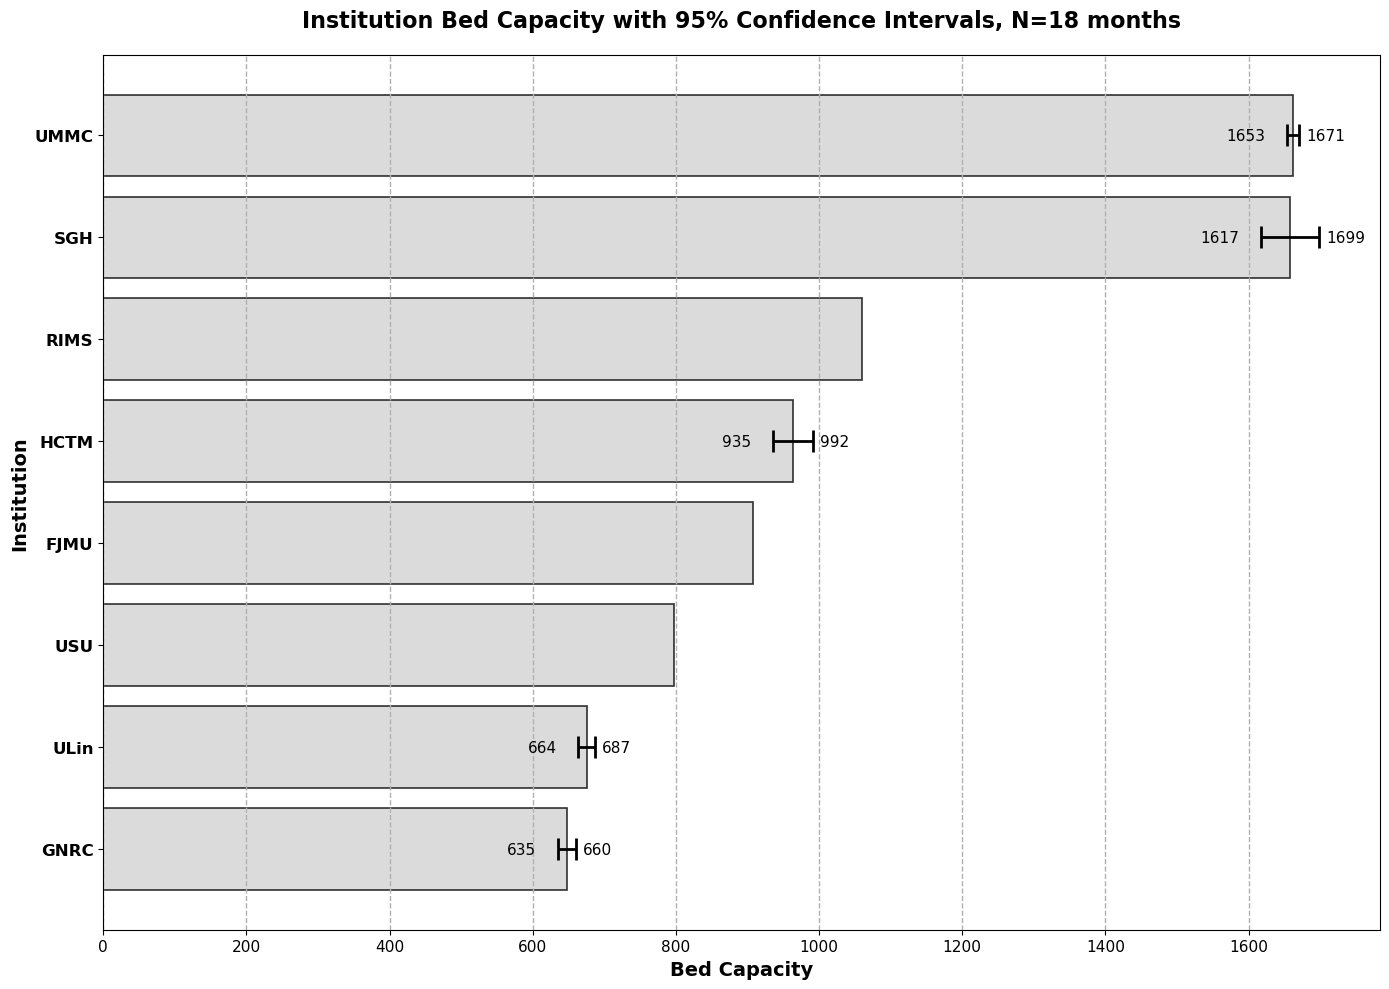

In [ ]:
plt.figure(figsize=(14, 10))
bed_summary_sorted = bed_summary.sort_values('mean', ascending=True)

bars = plt.barh(bed_summary_sorted[institution_col], bed_summary_sorted['mean'], 
                color='lightgrey', alpha=0.8, edgecolor='black', linewidth=1.2, 
                label='Mean Bed Capacity')

error_lower = bed_summary_sorted['mean'] - bed_summary_sorted['ci_lower']
error_upper = bed_summary_sorted['ci_upper'] - bed_summary_sorted['mean']

plt.errorbar(bed_summary_sorted['mean'], bed_summary_sorted[institution_col], 
             xerr=[error_lower, error_upper], 
             fmt='none', color='black', capsize=8, capthick=2, linewidth=2)

for i, (_, row) in enumerate(bed_summary_sorted.iterrows()):
    # 95% CI lower bound
    plt.text(row['ci_lower'] - 30, i, 
             f"{row['ci_lower']:.0f}", 
             ha='right', va='center', fontsize=11)
    
    # 95% CI upper bound  
    plt.text(row['ci_upper'] + 10, i, 
             f"{row['ci_upper']:.0f}", 
             ha='left', va='center', fontsize=11)

plt.xlabel('Bed Capacity', fontweight='bold', fontsize=14)
plt.ylabel('Institution', fontweight='bold', fontsize=14)
plt.title('Institution Bed Capacity with 95% Confidence Intervals, N=18 months', 
          fontweight='bold', fontsize=16, pad=20)

plt.grid(True, linestyle='-', alpha=1.0, linewidth=1.0, axis='x')
plt.grid(True, linestyle='--', alpha=1.0, linewidth=1.0, axis='x')

plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.tight_layout()

plt.show()
